In [1]:
from google.colab import files
files.upload()  # Upload net.keras when prompted


Saving 0a01cc10-3892-4311-9c48-0ac6ab3c7c43___RS_GLSp 9352_270deg.JPG to 0a01cc10-3892-4311-9c48-0ac6ab3c7c43___RS_GLSp 9352_270deg.JPG


{'0a01cc10-3892-4311-9c48-0ac6ab3c7c43___RS_GLSp 9352_270deg.JPG': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01\x00\x01\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\x

In [2]:
import tensorflow as tf
model = tf.keras.models.load_model("/content/drive/MyDrive/net .keras")


In [3]:
# STEP 3: Define class names
class_names = {
    0: 'Healthy',
    1: 'Rust',
    2: 'Blight',
    3: 'Leaf Spot Gray'
}


Upload an image to predict:


Saving 0ba90f90-3702-438a-908b-85871f3a34cb___RS_GLSp 4342_new30degFlipLR.JPG to 0ba90f90-3702-438a-908b-85871f3a34cb___RS_GLSp 4342_new30degFlipLR (1).JPG


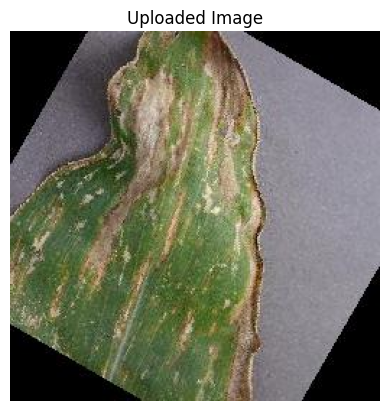

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

=== Prediction Result ===
Predicted class: Leaf Spot Gray
Confidence: 71.25%

All class probabilities:
Healthy: 1.63%
Rust: 13.48%
Blight: 13.65%
Leaf Spot Gray: 71.25%


In [ ]:
# STEP 4: Upload image and predict
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def predict_leaf_disease():
    print("Upload an image to predict:")
    uploaded = files.upload()
    if not uploaded:
        print("No image uploaded.")
        return

    for filename in uploaded.keys():
        try:
            img = Image.open(filename)
            plt.imshow(img)
            plt.axis('off')
            plt.title("Uploaded Image")
            plt.show()

            img = image.load_img(filename, target_size=(150, 150))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0

            prediction = model.predict(img_array)
            predicted_class = np.argmax(prediction[0])
            confidence = np.max(prediction[0]) * 100

            print("\n=== Prediction Result ===")
            print(f"Predicted class: {class_names[predicted_class]}")
            print(f"Confidence: {confidence:.2f}%")

            print("\nAll class probabilities:")
            for i, prob in enumerate(prediction[0]):
                print(f"{class_names[i]}: {prob * 100:.2f}%")

        except Exception as e:
            print(f"Error processing file {filename}: {e}")

# Call the function
predict_leaf_disease()
